# URL Link to QR Code Translation:

In [183]:
import qrcode
import pandas as pd
from IPython.display import display
import numpy as np
import os

In [184]:
# The link that will be encoded
url1 = "google.com"

### Importing Phishing Dataset:

In [185]:
path = r"C:\Users\loera\Documents\Datasets\Phishing_URLs\PhiUSIIL_Phishing_URL_Dataset.csv"

In [186]:
# Removing the filename from the DataFrame
dataset = pd.read_csv(path)
dataset.drop("FILENAME", axis=1, inplace=True)
dataset.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1


### Initializing Translator:

In [187]:
qr_translator = qrcode.QRCode(version=1, # controls size of QR code
                              error_correction=qrcode.constants.ERROR_CORRECT_M,
                              box_size=12, # size of each box in pixels
                              border=2 # thickness of border
                              )

### Adding and Compiling Data: 

In [188]:
# Adds data to QR translator
qr_translator.add_data(url1)

# Compiling data into QR code arrays
qr_translator.make()

In [189]:
# Printing QR code as a binary matrix
matrix = qr_translator.get_matrix()
matrix = np.array(matrix)
bin_matrix = matrix.astype(int)
for row in bin_matrix:
    print(row)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0]
[0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0]
[0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0]
[0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0]
[0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0]
[0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0]
[0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0]
[0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0]
[0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0]
[0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0]
[0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0]
[0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0]
[0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
[0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0]
[0 0 1 0 1 1

### Generating the QR Code Image:

In [190]:
def generate_qr(dataset: pd.DataFrame, translator: qrcode.QRCode, save_path: str):
    
    urls = dataset.loc[:, "URL"]
    
    for i, url in enumerate(urls):
        file_name = str(i) + ".png"
        full_path = os.path.join(save_path, file_name)
        if i < 5 :
            print(url)
            translator.add_data(url)
            translator.make()
            qr_code = translator.make_image()
            qr_code.save(full_path)
            display(qr_code)
            translator.clear()
        else:
            print("stop")
            break

https://www.southbankmosaics.com


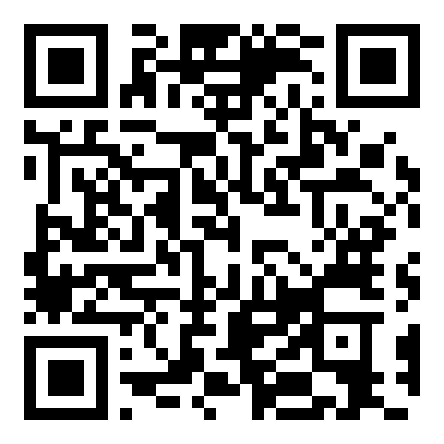

https://www.uni-mainz.de


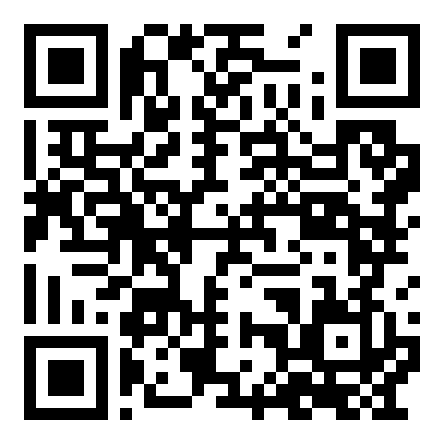

https://www.voicefmradio.co.uk


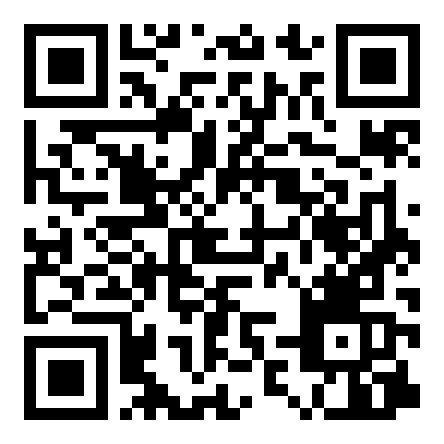

https://www.sfnmjournal.com


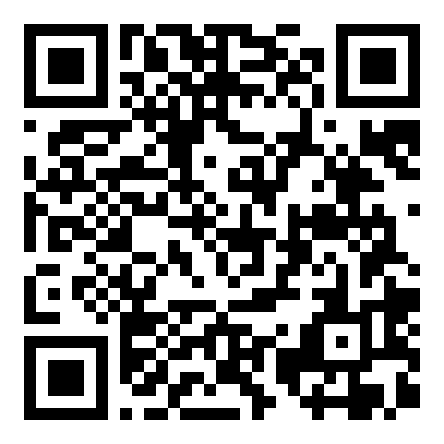

https://www.rewildingargentina.org


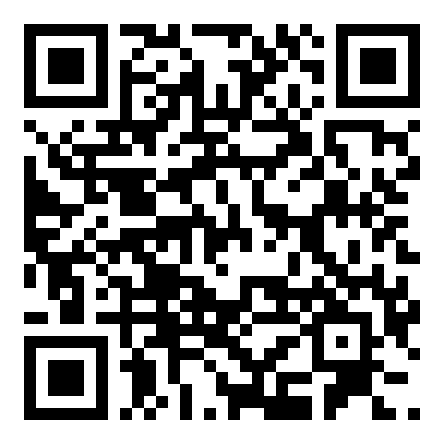

stop


In [191]:
qr_save_path = r"C:\Users\loera\Documents\Datasets\Phishing_URLs\QR_Codes"
generate_qr(dataset, qr_translator, qr_save_path)